# Homework 1
***
**Name**: **Jason Lubrano**
***

This assignment is due on Moodle by **09:30am on Thrusday September 13th**. Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. Your solutions to analysis questions should be done in Markdown directly below the associated question.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.

The rules to be followed for the assignment are:

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function or class API **do not** change it.
- Do not change the location of the data or data directory.  Use only relative paths to access the data. 

In [3]:
import argparse
import pandas as pd
import numpy as np
import pickle
from pathlib import Path

### [5 points] Problem 1
***

The Function below should for the ith column calculate and return: 
- Number of objects
- The minimum value
- The maximum value
- The mean value
- The standard deviation value
- The Q1 value
- The median value
- The Q3 value
- The IQR value

Note:
- Download the data file and store it in the location "data/dataset.csv" . Please maintain this as it would be necessary while grading.
- Do not change the variable names of the returned values.
- After calculating each of those values, assign them to the corresponding value that is being returned.
- The ithAttribute value can range from 1 - 13

In [4]:
def calculate( dataFile, col_num):
    """
    Input Parameters:
        dataFile: The dataset file.
        ithAttre: The ith attribute for which the various properties must be calculated.

    Default value of 0,infinity,-infinity are assigned to all the variables as required. 
    """
    numObj, minValue, maxValue, mean, stdev, Q1, median, Q3, IQR = [0,"inf","-inf",0,0,0,0,0,0]
    
    # making data frame from csv file
    data = pd.read_csv(dataFile)
    df = pd.DataFrame(data)
    df.dropna()
    # Used for testing purposes
    # print(df.head())
    
    df_col = df.iloc[ : , col_num]
    # print(df_col)
    
    minValue = df_col.min()
    maxValue = df_col.max()
    
    sum_col = df_col.sum()
    numObj = df_col.count()
    
    mean = sum_col/numObj
    
    stdev = df_col.std()
    
    Q1 = np.percentile(df_col, 25)
    Q3 = np.percentile(df_col, 75)
    
    median = df_col.median()
    
    IQR = Q3 - Q1
    
    # test output with this
    # print(df_col.describe())
    #YOUR TASK: Write code to assign the values to the respective variables.
    return numObj, minValue, maxValue, mean, stdev, Q1, median, Q3, IQR

### Here are the unit tests. You don't need to modify them. Simply execute the cell and observe the output.

In [5]:
import unittest

class TestKnn(unittest.TestCase):
    def setUp(self):
        self.loc = "data/dataset.csv"
        file = open('data/testing', 'rb')
        self.data = pickle.load(file)
        file.close()
        
    def test0(self):
        """
        Test the label counter 
        """
        self.column = self.data[0]
        result = calculate(self.loc,self.column)
        self.assertEqual(result[0],self.data[1][0])
        self.assertAlmostEqual(result[1],self.data[1][1], places = 1)
        self.assertAlmostEqual(result[2],self.data[1][2], places = 1)
        self.assertAlmostEqual(result[3],self.data[1][3], places = 1)
        self.assertAlmostEqual(result[4],self.data[1][4], places = 1)
        self.assertAlmostEqual(result[5],self.data[1][5], places = 1)
        self.assertAlmostEqual(result[6],self.data[1][6], places = 1)
   
tests = TestKnn()
tests_to_run = unittest.TestLoader().loadTestsFromModule(tests)
unittest.TextTestRunner().run(tests_to_run)

.
----------------------------------------------------------------------
Ran 1 test in 0.192s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

In [6]:
import matplotlib.pyplot as plt

def graph_hw1_3():
    # making data frame from csv file
    data = pd.read_csv("data/dataset.csv")
    df = pd.DataFrame(data)
    df.dropna()
    # Used for testing purposes
    # print(df.head())
    
    df_tgraph = df[["T3", "T5"]]
    #print(df_tgraph.head())
    
    fig, ax = plt.subplots(
        nrows=1,
        ncols=1,
        figsize=(16,9)
    )
    
    plt.scatter(
        x=df_tgraph.T3,
        y=df_tgraph.T5, 
        alpha=0.5,
        color="purple",
        label="T3 vs T5 point"
    )

    ax.set_xlabel(
        "T3 Data",
        fontsize=16,
        color="purple"
    )

    ax.set_ylabel(
        "T5 Data",
        fontsize=16,
        color="purple"
    )

    ax.set_title(
        "T3 vs T5 Scatter plot",
        fontsize=24,
        color="purple"
    )
    
    ax.grid(
        alpha=0.1,
        color="purple"
    )
    
    ax.set_axisbelow(
        True
    )

    plt.legend()

    plt.show()

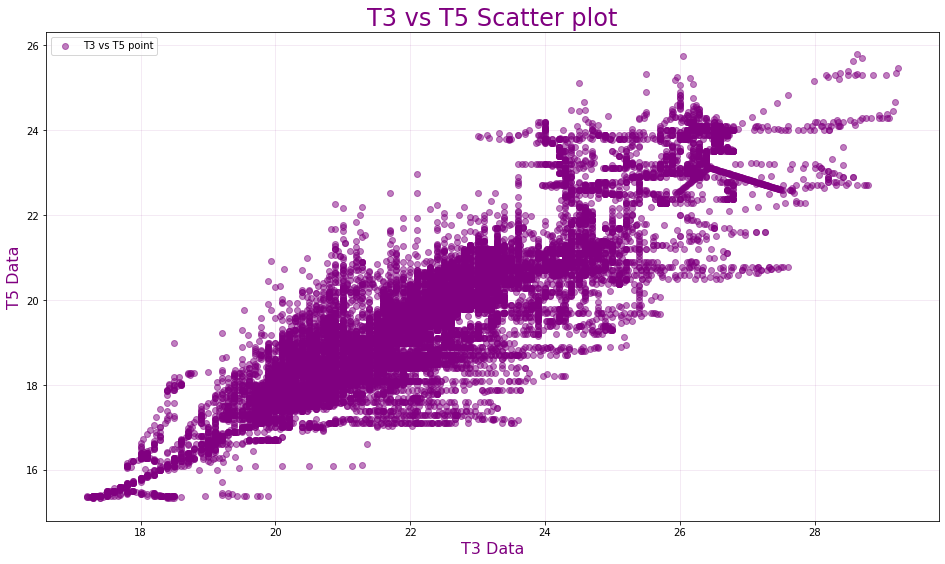

In [7]:
graph_hw1_3()